### Plotting some basic histograms of event distributions  
#### July 10th, 2018

This explores functionality in the Seaborn library, and makes a polar histogram

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import obspy as op
import seaborn as sns
import numpy as np
import matplotlib.cm as cm

In [3]:
all_events = pd.read_csv("all_events.dat",sep=" ",names=['lon','lat','date'])

In [4]:
unique_events = all_events[all_events['date'].isin(all_events['date'].unique())]

In [8]:
def get_baz(inputs):
    
    lat1 = float(inputs[0])
    lon1 = float(inputs[1])
    Alon = -147
    Alat = 63
    
    [dist,az,baz] = op.geodetics.gps2dist_azimuth(Alat,Alon,lat1,lon1)
    
    return az

In [9]:
unique_events['baz'] = unique_events[['lat','lon']].apply(get_baz,axis=1)

### Histrogram option 1: Just a regular histrogram

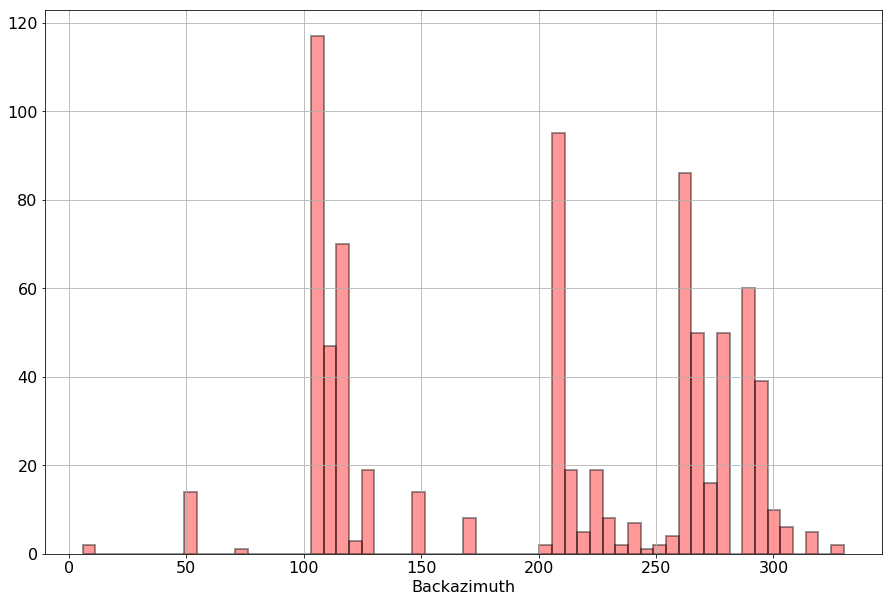

In [11]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('',fontsize=16)
sns.distplot(unique_events['baz'],bins=60,kde=False,axlabel='Backazimuth',color='red',hist_kws=dict(edgecolor="k", linewidth=2))
plt.grid()
plt.savefig('hist_plot1.png',dpi=600)

### Histogram option 2: Polar histogram.

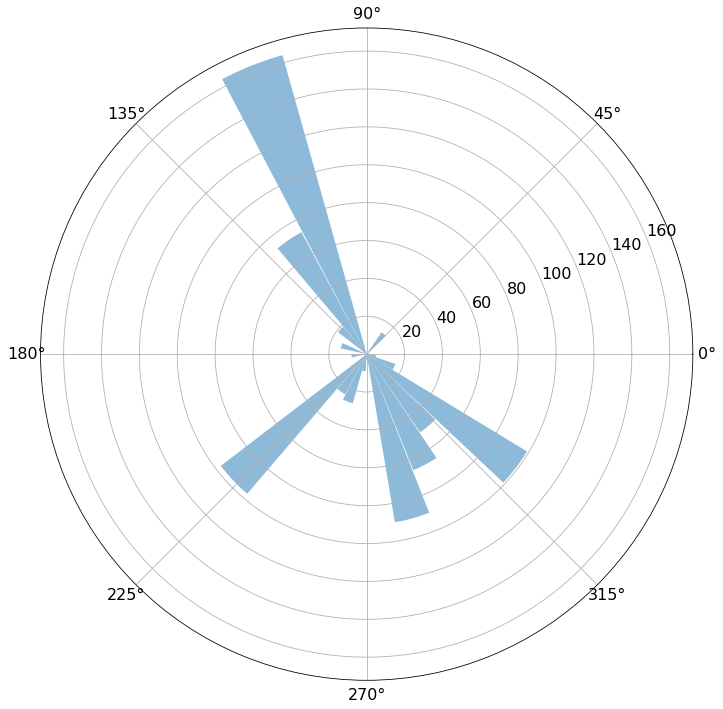

In [13]:
N = 30
deg2rad = np.pi/180

#The values to be grouped
arr = (unique_events['baz'].values)*(deg2rad)

# create theta
theta = np.linspace(0.0, 2 * np.pi, N)

# make the histogram with N bins
radii, tick = np.histogram(arr, bins = N)

# width of each bin on the plot
width = (2*np.pi) / N

# make a polar plot
plt.figure(figsize = (12, 12))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta,radii,width=width,bottom=0)

# edit the tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# choose betweeen clockwise and anticlockwise
ax.set_theta_direction(1)

#Can add color to each bar, for example
for r,bar in zip(radii, bars):
    bar.set_alpha(0.5)

# set the label
#ticks = ['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00']
#ax.set_xticklabels(ticks)

plt.savefig('BAZ_plot2.png',dpi=600)